# 7. Aprovechando LLMs locales

## ollama

<center><img src="https://ollama.com/public/ollama.png"></center>

Ollama es una app chiquita que permite obtener y correr LLMs de forma sencilla. Podemos visitar la [documentación](https://github.com/ollama/ollama/blob/main/README.md#quickstart) para saber más características. Hay una lista de modelos disponibles y filtros para identificar sus capacidades.

### Modelos de Embeddings

<center><img src="https://ollama.com/public/blog/what-are-embeddings.svg" width=500></center>

Estos modelos estan especialmente diseñados para generar vectores de embeddings (o seá arreglos de números que capturan características semánticas y de otros tipos de la entrada). Estos modelos son fundamentales para crear aplicaciones como *RAGs*.

> source: https://ollama.com/blog/embedding-models

### Modelos con soporte para *tools*

<center><img src="https://wallpapercave.com/wp/wp2195747.jpg" width=500></center>

Llamar *tools* le da la posibilidad a los LLMs de realizar tareas complejas o interactuar con entornos fuera del contexto local del LLM:

Ejemplos pueden ser los siguientes:

- Uso de funciones pre-exitentes o APIs
- Navegación en la web
- Utilizar un interprete de código

> source: https://ollama.com/blog/tool-support

### Comandos útiles

In [ ]:
!ollama serve &

In [ ]:
!ollama

Usage:
  ollama [flags]
  ollama [command]

Available Commands:
  serve       Start ollama
  create      Create a model from a Modelfile
  show        Show information for a model
  run         Run a model
  stop        Stop a running model
  pull        Pull a model from a registry
  push        Push a model to a registry
  list        List models
  ps          List running models
  cp          Copy a model
  rm          Remove a model
  help        Help about any command

Flags:
  -h, --help      help for ollama
  -v, --version   Show version information

Use "ollama [command] --help" for more information about a command.


In [ ]:
!ollama list

NAME                       ID              SIZE      MODIFIED   
qwen3:1.7b                 458ce03a2187    1.4 GB    3 days ago    
nomic-embed-text:latest    0a109f422b47    274 MB    4 days ago    
qwen2.5-coder:1.5b         6d3abb8d2d53    986 MB    6 days ago    
qwen2.5-coder:0.5b         d392ed348d5b    531 MB    6 days ago    
codegemma:7b               0c96700aaada    5.0 GB    6 days ago    
gemma3:4b                  a2af6cc3eb7f    3.3 GB    7 days ago    


In [ ]:
!ollama pull <model>

Modelos a utiliza:

### nomic-embed-text:latest   
### qwen3:1.7b             
### qwen2.5-coder:0.5b 

### Probando en terminal

- Simples preguntas
- Creando un `ModelFile`
- ollama API

```bash
curl http://localhost:11434/api/chat -d '{
  "model": "llama3.2",
  "messages": [
    { "role": "user", "content": "why is the sky blue?" }
  ]
}'
```

### Integrando llms a nuestro flujo de trabajo local

Vamos a integrar los modelos que obtenemos con `ollama` para completado de código en nuestro editor de código vía un plug-in llamado [Continue](https://docs.continue.dev/).

#### Demo en vivo (esperemos que salga bien)

- https://docs.continue.dev/customize/deep-dives/autocomplete

## Question answering (*Q&A*) y la técnica de Retrieval-augmented generation (*RAG*)

Una tarea que han resuleto los LLMs es la generación de respuestas a preguntas del usuario. Sistemas especializados en *Q&A* de hecho han mostrado ser tan buenos o mejores que personas antes de los LLMs. Por ejemplo, Watson que ganó el juego Jeopardy en 2011 superando humanos en preguntas como:

> Soy la comida por la que le hacen burla a los chilangos fuera de la CDMX^[1]

[1]: Guajolota

In [1]:
%%HTML
<iframe width="960" height="515" src="https://www.youtube.com/embed/P18EdAKuC1U"></iframe>

Los sistemas de *Q&A* estan diseñados para completar información de acuerdo a las necesidades de las personas. Ya que mucha información está disponible en forma de texto (como en internet, libros o nuestros emails), estos sistemas están intimamente ligados a los motores de búsqueda. En realidad, esta distinción es cada vez más difusa ya que los motores de búsqueda actuales incorporan LLMs para proponer respuestas.

<center><img src="https://nextcloud.tepezil.net/apps/files_sharing/publicpreview/85Mdrbi8CyYjxjs?file=/&fileId=74451&x=2560&y=1440&a=true&etag=e0442b519a9265c9e9324e41716c8929" width=700></center>

En general los sistemas de *Q&A* se han enfocado en un subtipo de preguntas: **factoides**. Este tipo de preguntas pueden ser respondidas con simples hecho expresados en respuestas cortas o medianas. Por ejemplo:

- ¿Dónde está el Museo de Antropología e Historia de la CDMX?
- ¿Cómo poner el `@` en un teclado en inglés?
- ¿Cómo instalar archlinux sin morir en el intento?^[2]

[2]: Visita la wiki: https://wiki.archlinux.org/

### ❓ Con los temas vistos ¿Cómo resolverían esta tarea?

Una opción es hacer un *fine-tunning* a un modelo pre-entrenado con un *dataset* de question-answering y despues crear prompts con la pregunta y la respuesta en blanco:

> Q: ¿Dónde se encuentra la biblioteca del IIMAS? R: ____

### Problemas de LLMs tirando factos

Los LLMs tienen varias deficiencias a la hora de responder a las preguntas que les hacemos

- **Alucinaciones:** Los modelos tienden a alucinar, esto es que crean respuestas que parecen convincentes y bien formadas pero que no son reales en absoluto. Es dificil saber cuando un modelo está alucinando.
- **Carencia de datos privados:** Los modelos han sido entrenados con grandes cantidades de datos pero no todos los datos posibles. Si queremos que respondan cosas acerca de nuestros correos o registros dentales probablemente no obtendremos respuestas satisfactorias.
- **Datos estáticos:** Los modelos tienen problemas en responder preguntas acerca de eventos cuya información esta cambiando rápidamente. Los LLMs se entrenan con datos hasta alguna fecha.

![](https://i.pinimg.com/originals/82/c1/22/82c122be87204cf8baa442aa27e68a84.gif)

### Acerca de los *RAGs*

Por las razones antes enumeradas, una estrategía para que los LLMs realicen *Q&A* efectivamente es la de *retrieval-augmented generation (RAG)*. *RAG* utiliza técnicas de *Information Retrieval (IR)* para obtener documentos que serán reelevantes para responder a la pregunta del usuario. Despues se utiliza un LLM para generar una respuesta con base en los documentos obtenidos.

Basar las respuestas en los documentos obtenidos resuelve varios de los problemas mencionados anteriormente. En primer lugar, ayuda a que la respuesta esté basada en hecho obtenidos de documentos previamente curados. Además, el sistema puede otorgar al usuario el contexto o documentos que tomó en cuenta para generar la respuesta (un ejemplo: [perplexity AI](https://www.perplexity.ai/search/las-bicicletas-de-pinon-fijo-s-Qr0l4YnETi.Q_d4yrxVyVA)). Esta característica brinda confianza y mayor explicabilidad. Por último, esta técnica permite agregar al sistema información personal o confidencial como registros médicos, legales o notas (aunque mucho ojo con dar sus datos a grandes empresas).

### Arquitectura de un *RAG*

La idea principal es que dada una **pregunta** del usuario y tomando en cuenta un conjunto de **documentos reelevantes** previamente **obtenidos** se **generar** una respuesta. Podemos entonces dividirlo en dos fases:

1. *Retrieval:* Obtenemos los documentos reelevantes de alguna colección
2. *Generation:* Se genera una respuesta con base en estos documentos reelvantes

<center><img src="https://nextcloud.tepezil.net/apps/files_sharing/publicpreview/qsnw9Q8q4TWLQ88?file=/&fileId=74486&x=2560&y=1440&a=true&etag=4560b4a64d98ac7e1e16b563ce2db91e" width=700></center>
> Tomada de Speech and Language Processing, (Jurafsky et al 2025)

Visto de otro modo, la tarea de *Q&A* puede modelarse como predicción de texto de forma auto-regresiva condicionada a un prompt con características particulares.

```
Q: ¿Quien escribió el libro 'Bovedas de acero'? A:
```

$$
p(x_1,...,x_n) = \displaystyle\prod_{i=1}^{n} p(\texttt{[Q:]};q;\texttt{[A:]};x_{<i})
$$

Podemos hacer esto gracias a que los LLMs codifican una enorme cantidad de información en los parámetros gracias al acceso a muchísimos datos de entrenamiento. Sin embargo, si bien esté prompt servirá para responder preguntas *factoides*, aún tendriamos los problemas de alucinaciones, falta de evidencia en la respuesta y limitaciones con datos no disponibles de forma pública.

Los *RAGs* lidian con este problema condicionando la respuesta con documentos reelevantes y algún prompts como: "Con base en los siguientes documentos, contesta la siguiente pregunta:"

Supongase que tenemos una query $q$ y un conjunto de documentos reelevantes a la query $R(q)$ el prompt se vería como se muestra a continuación:

```c
doc 1
doc 2
...
doc n

Con base en los textos anteriores, responde esta pregunta: Q: "¿Quien escribió el libro 'Bovedas de acero'" A:
```

$$
p(x_1,...,x_n) = \displaystyle\prod_{i=1}^{n} p(x_i|R(q);prompt;\texttt{[Q:]};q;\texttt{[A:]};x_{<i})
$$

Se pueden combinar enfoques legados como $tfidf$ o $BM25$ con representaciones densas (AKA *embeddings*) de los documentos para la obtención y ordenamiento de los documentos reelevantes. Una parte importante es el *prompt engineering*; decidir como marcar la pregunta o los documentos o si agregar tokens especiales como `[SEP]` puede mejorar o empeorar nuestros resultados.

- [Curso gratuito de Prompt Engineering, DeepLearning.AI](https://www.deeplearning.ai/short-courses/chatgpt-prompt-engineering-for-developers/)

## Creando un RAG con `langchain`

In [2]:
import os
from rich import print as rprint

# Necesario que langchain vea esto
os.environ["OLLAMA_HOST"] = "127.0.0.1"
os.environ["OLLAMA_PORT"] = "11434"

In [3]:
rprint(os.environ)

environ({
    'BROWSER': 'firefox',
    'COLORTERM': 'truecolor',
    'CONDA_EXE': '/opt/miniconda3/bin/conda',
    'CONDA_PYTHON_EXE': '/opt/miniconda3/bin/python',
    'CONDA_SHLVL': '0',
    'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus',
    'DEBUGINFOD_URLS': 'https://debuginfod.archlinux.org ',
    'DESKTOP_SESSION': 'gnome',
    'DISPLAY': ':0',
    'EDITOR': 'nvim',
    'FZF_DEFAULT_COMMAND': 'fd --type f --hidden --exclude .git',
    'GDMSESSION': 'gnome',
    'GDM_LANG': 'en_US.UTF-8',
    'GIO_LAUNCHED_DESKTOP_FILE_PID': '2374',
    'GNOME_KEYRING_CONTROL': '/run/user/1000/keyring',
    'GNOME_SETUP_DISPLAY': ':1',
    'GOPATH': '/home/umoqnier/go/bin/',
    'HOME': '/home/umoqnier',
    'INVOCATION_ID': 'd4b57d9c98974eb99981fdaf37ad2d77',
    'JOURNAL_STREAM': '9:15040',
    'KITTY_INSTALLATION_DIR': '/usr/lib/kitty',
    'KITTY_PID': '2374',
    'KITTY_PUBLIC_KEY': '1:?ER0gqZ{Qn!&L`sK1WU;MBXi8`RTdBFksq$_k@=)',
    'KITTY_WINDOW_ID': '1',
    'LANG': 'en_US.UTF-8',
    'LC_ADDRESS': 'en_US.UTF-8',
    'LC_IDENTIFICATION': 'en_US.UTF-8',
    'LC_MEASUREMENT': 'en_US.UTF-8',
    'LC_MONETARY': 'en_US.UTF-8',
    'LC_NAME': 'en_US.UTF-8',
    'LC_NUMERIC': 'en_US.UTF-8',
    'LC_PAPER': 'en_US.UTF-8',
    'LC_TELEPHONE': 'en_US.UTF-8',
    'LC_TIME': 'en_US.UTF-8',
    'LESS': '-R',
    'LOGNAME': 'umoqnier',
    'LSCOLORS': 'Gxfxcxdxbxegedabagacad',
    'LS_COLORS': 
'rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01;35:bd=40;33;01:cd=40;33;01:or=40;31;01:mi=00:su=37;41:sg=30;4
3:ca=00:tw=30;42:ow=34;42:st=37;44:ex=01;32:*.7z=01;31:*.ace=01;31:*.alz=01;31:*.apk=01;31:*.arc=01;31:*.arj=01;31:
*.bz=01;31:*.bz2=01;31:*.cab=01;31:*.cpio=01;31:*.crate=01;31:*.deb=01;31:*.drpm=01;31:*.dwm=01;31:*.dz=01;31:*.ear
=01;31:*.egg=01;31:*.esd=01;31:*.gz=01;31:*.jar=01;31:*.lha=01;31:*.lrz=01;31:*.lz=01;31:*.lz4=01;31:*.lzh=01;31:*.
lzma=01;31:*.lzo=01;31:*.pyz=01;31:*.rar=01;31:*.rpm=01;31:*.rz=01;31:*.sar=01;31:*.swm=01;31:*.t7z=01;31:*.tar=01;
31:*.taz=01;31:*.tbz=01;31:*.tbz2=01;31:*.tgz=01;31:*.tlz=01;31:*.txz=01;31:*.tz=01;31:*.tzo=01;31:*.tzst=01;31:*.u
deb=01;31:*.war=01;31:*.whl=01;31:*.wim=01;31:*.xz=01;31:*.z=01;31:*.zip=01;31:*.zoo=01;31:*.zst=01;31:*.avif=01;35
:*.jpg=01;35:*.jpeg=01;35:*.jxl=01;35:*.mjpg=01;35:*.mjpeg=01;35:*.gif=01;35:*.bmp=01;35:*.pbm=01;35:*.pgm=01;35:*.
ppm=01;35:*.tga=01;35:*.xbm=01;35:*.xpm=01;35:*.tif=01;35:*.tiff=01;35:*.png=01;35:*.svg=01;35:*.svgz=01;35:*.mng=0
1;35:*.pcx=01;35:*.mov=01;35:*.mpg=01;35:*.mpeg=01;35:*.m2v=01;35:*.mkv=01;35:*.webm=01;35:*.webp=01;35:*.ogm=01;35
:*.mp4=01;35:*.m4v=01;35:*.mp4v=01;35:*.vob=01;35:*.qt=01;35:*.nuv=01;35:*.wmv=01;35:*.asf=01;35:*.rm=01;35:*.rmvb=
01;35:*.flc=01;35:*.avi=01;35:*.fli=01;35:*.flv=01;35:*.gl=01;35:*.dl=01;35:*.xcf=01;35:*.xwd=01;35:*.yuv=01;35:*.c
gm=01;35:*.emf=01;35:*.ogv=01;35:*.ogx=01;35:*.aac=00;36:*.au=00;36:*.flac=00;36:*.m4a=00;36:*.mid=00;36:*.midi=00;
36:*.mka=00;36:*.mp3=00;36:*.mpc=00;36:*.ogg=00;36:*.ra=00;36:*.wav=00;36:*.oga=00;36:*.opus=00;36:*.spx=00;36:*.xs
pf=00;36:*~=00;90:*#=00;90:*.bak=00;90:*.crdownload=00;90:*.dpkg-dist=00;90:*.dpkg-new=00;90:*.dpkg-old=00;90:*.dpk
g-tmp=00;90:*.old=00;90:*.orig=00;90:*.part=00;90:*.rej=00;90:*.rpmnew=00;90:*.rpmorig=00;90:*.rpmsave=00;90:*.swp=
00;90:*.tmp=00;90:*.ucf-dist=00;90:*.ucf-new=00;90:*.ucf-old=00;90:',
    'MAIL': '/var/spool/mail/umoqnier',
    'MANAGERPID': '1423',
    'MEMORY_PRESSURE_WATCH': 
'/sys/fs/cgroup/user.slice/user-1000.slice/user@1000.service/session.slice/org.gnome.SettingsDaemon.MediaKeys.servi
ce/memory.pressure',
    'MEMORY_PRESSURE_WRITE': 'c29tZSAyMDAwMDAgMjAwMDAwMAA=',
    'MOTD_SHOWN': 'pam',
    'OLDPWD': '/home/umoqnier',
    'PAGER': 'cat',
    'PATH': 
'/home/umoqnier/develop/lectures/st-cl-2025-2-lab/.venv/bin:/opt/miniconda3/condabin:/home/umoqnier/.emacs.d/bin:/h
ome/umoqnier/.cargo/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/lib/jvm/default/bin:/usr/bin/site_perl:/usr/bi
n/vendor_perl:/usr/bin/core_perl:/opt/rocm/bin

### Dependencias

```
"langchain-text-splitters>=0.3.8",
"langchain-community>=0.3.21",
"langgraph>=0.4.3",
"langchain-ollama>=0.3.2",
"langchain-chroma>=0.2.2",
```

### Cargando un modelo

In [4]:
from langchain_ollama.chat_models import ChatOllama

MODEL = "qwen3:1.7b"

llm = ChatOllama(model=MODEL)

### Cargando embeddings

In [5]:
from langchain_ollama.embeddings import OllamaEmbeddings

embeddings = OllamaEmbeddings(model="nomic-embed-text:latest")

In [6]:
import bs4
from rich import print as rprint
from rich.rule import Rule
from langchain import hub
from langchain_core.documents import Document
from typing_extensions import List, TypedDict

### Creación de un motor de búsquedas semánticas

LangChain utiliza abtracciones para integrar la carga y recuperación de información en bases de datos vectoriales, y otras fuentes, en un flujo con LLMs. Estas abstracciones son importantes para aplicaciones que requieren extraer datos y hacer "razonamiento" sobre los mismos como parte de la inferencia (como es el caso del RAG). Estas abstracciones son:

#### Documentos y cargadores

Los documentos representan unidades de texto con metadata que puede carpturar información sobre donde viene el documento, su relación con otros documentos y más.

In [7]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="Simply put, bikepacking is a mix of all-terrain cycling and backpacking.",
        metadata={"source": "bikepacking-doc"},
    ),
    Document(
        page_content="Bikepacking involves carrying the essential gear—and not much more—on an off-road-capable bike for an overnight or multi-day ride",
        metadata={"source": "bikepacking-doc"},
    ),
]

Sin embargo, es más común utilizar [*doc loaders*](https://python.langchain.com/docs/concepts/document_loaders/) para obtener [integraciones](https://python.langchain.com/docs/integrations/document_loaders/) varias con fuentes de datos.

In [8]:
from langchain_community.document_loaders import WebBaseLoader

# Cargador basado en extracción de datos de la web
loader = WebBaseLoader(
    web_paths=(
        "https://lilianweng.github.io/posts/2023-06-23-agent/",
        "https://www.davidsbatista.net/blog/2017/11/13/Conditional_Random_Fields/",
        "https://www.davidsbatista.net/blog/2017/11/12/Maximum_Entropy_Markov_Model/"
        ),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header", "post")
        )
    ),
)
docs = loader.load()

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [10]:
rprint(f"Total documents {len(docs)}")
for i, doc in enumerate(docs, start=1):
    rprint(Rule(f"Doc {i}"))
    rprint(doc.page_content[:300])
    rprint(doc.metadata)

Total documents 3

────────────────────────────────────────────────────── Doc 1 ──────────────────────────────────────────────────────

LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts
demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as i

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}

────────────────────────────────────────────────────── Doc 2 ──────────────────────────────────────────────────────

Conditional Random Fields for Sequence Prediction


        13 November 2017
      



This is the third and (maybe) the last part of a series of posts about sequential supervised learning applied to 
NLP. In this post I will talk about Conditional Random Fields (CRF), explain what was the main mot

{'source': 'https://www.davidsbatista.net/blog/2017/11/13/Conditional_Random_Fields/'}

────────────────────────────────────────────────────── Doc 3 ──────────────────────────────────────────────────────

Maximum Entropy Markov Models and Logistic Regression


        12 November 2017
      



This is the second part of a series of posts about sequential supervised learning applied to NLP. It can be seen as
a follow-up to the previous post, where I tried to explain the relationship between HMM and

{'source': 'https://www.davidsbatista.net/blog/2017/11/12/Maximum_Entropy_Markov_Model/'}

#### Separadores de texto (*text splitters*)

Típicamente en las aplicaciones de recuperación de información o *question answering* una página de un documento puede ser demasiado grande para una representación. Lo que buscamos es obtener partes del documento para contestar preguntas basadas en la *query* de entrada y separar los documentos va a prevenir que porciones reelevantes del texto no sean opacadas por texto alrededor.

Definiremos la cantidad de caracteres que tendrá cada *chunk* y los caracteres de *overlap*, que ayuda a mitigar que perdamos información reelevante al separar el documento. `RecursiveCharacterTextSplitter` separará recursivamente utilizando el salto de línea hasta obtener *chunks* del tamaño deseado.

In [11]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200, add_start_index=True)
all_splits = text_splitter.split_documents(docs)

In [12]:
rprint(f"Splits {len(all_splits)}")
for i, split in enumerate(all_splits[80:90], start=1):
    rprint(Rule(f"split #{i}"))
    rprint(split)

Splits 102

──────────────────────────────────────────────────── split #1 ─────────────────────────────────────────────────────

Document(
    metadata={
        'source': 'https://www.davidsbatista.net/blog/2017/11/13/Conditional_Random_Fields/',
        'start_index': 10702
    },
    page_content="Graph representation of HMM, MEMM and CRF.  (taken from Lafferty et al. 2001)\n\n\nHidden Markov 
Models:\n\n\n\\[P(\\bar{y}, \\bar{x}) = \\prod\\limits_{i=1}^{|\\bar{y}|} P(y_{i} \\mid y_{i-1}) \\cdot P(x_{i} 
\\mid y_{i})\\]\n\n\n\nMaximum Entropy Markov Models:\n\n\n\\[P(\\bar{y}, \\bar{x}) = 
\\prod\\limits_{i=1}^{|\\bar{y}|} P(y_{i} \\mid y_{i-1}, x_{i}) = \\prod\\limits_{i=1}^{|\\bar{y}|} 
\\frac{1}{Z(x,y_{i-1})}\\  \\exp\\bigg( \\sum_{j=1}^{N} w_{j} \\cdot f_{j}(x,y_{i-1}) \\bigg)\\]\n\n\n\nConditional
Random Fields:\n\n\n\\[P(\\bar{y} \\mid \\bar{x}, \\bar{w}) = \\frac{\\exp(\\bar{w} \\cdot 
F(\\bar{x},\\bar{y}))}{\\sum\\limits_{\\bar{y}' \\in Y} \\exp(\\bar{w} \\cdot F(\\bar{x},\\bar{y}'))}\\]\n\n\nCRF 
Important Observations\n\n\nMEMMs are normalized locally over each observation and hence suffer from the Label Bias
problem, where the transitions going out from a state compete only against each other, as opposed to all the other 
transitions in the model."
)

──────────────────────────────────────────────────── split #2 ─────────────────────────────────────────────────────

Document(
    metadata={
        'source': 'https://www.davidsbatista.net/blog/2017/11/13/Conditional_Random_Fields/',
        'start_index': 11602
    },
    page_content='CRFs avoid the label bias problem a weakness exhibited by Maximum Entropy Markov Models (MEMM). 
The big difference between MEMM and CRF is that MEMM is locally renormalized and suffers from the label bias 
problem, while CRFs are globally renormalised.\n\n\nThe inference algorithm in CRF is again based on the Viterbi 
algorithm.\n\n\nOutput transition and observation probabilities are not modelled separately.\n\n\nOutput transition
dependent on the state and the observation as one conditional probability.\n\n\nSoftware 
Packages\n\n\npython-crfsuite: is a python binding for CRFsuite which is a fast implementation of Conditional 
Random Fields written in C++.\n\n\nCRF++: Yet Another CRF toolkit: is a popular implementation in C++ but as far as
I know there are no python bindings.\n\n\nMALLET: includes implementations of widely used sequence algorithms 
including hidden Markov models (HMMs) and linear chain conditional random fields (CRFs), it’s written in Java.'
)

──────────────────────────────────────────────────── split #3 ─────────────────────────────────────────────────────

Document(
    metadata={
        'source': 'https://www.davidsbatista.net/blog/2017/11/13/Conditional_Random_Fields/',
        'start_index': 12372
    },
    page_content='MALLET: includes implementations of widely used sequence algorithms including hidden Markov 
models (HMMs) and linear chain conditional random fields (CRFs), it’s written in Java.\n\n\nFlexCRFs supports both 
first-order and second-order Markov CRFs, it’s written in C/C++ using the STL library.\n\n\npython-wapiti is a 
python wrapper for wapiti, a sequence labelling tool with support for maxent models, maximum entropy Markov models 
and linear-chain CRF.\n\n\nReferences\n\n\n“Conditional Random Fields: Probabilistic Models for Segmenting and 
Labeling Sequence Data”\n\n\n“Log-linear models and Conditional Random Fields”. Notes for a tutorial at CIKM’08 by 
Charles Elkan. October 20, 2008”\n\n\nVideo: tutorial at CIKM’08 by Charles Elkan\n\n\n“Conditional Random Fields: 
An Introduction”. Hanna M. Wallach, February 24, 2004. University of Pennsylvania CIS Technical Report 
MS-CIS-04-21\n\n\n“Statistical NLP for the Web Log Linear Models, MEMM, Conditional Random Fields” class by Sameer 
Maskey'
)

──────────────────────────────────────────────────── split #4 ─────────────────────────────────────────────────────

Document(
    metadata={
        'source': 'https://www.davidsbatista.net/blog/2017/11/13/Conditional_Random_Fields/',
        'start_index': 13243
    },
    page_content='“Statistical NLP for the Web Log Linear Models, MEMM, Conditional Random Fields” class by Sameer 
Maskey\n\n\n“Log-Linear Models, MEMMs, and CRFs”. Michael Collins\n\n\n“An Introduction to Conditional Random 
Fields” Sutton, Charles; McCallum, Andrew (2010)\n\n\nAcknowledgments\nThe writing of this post is also the outcome
of many discussions and white board sessions I had together with Tobias Sterbak and Sebastian Mika.\nRelated 
posts\n\n\nHidden Markov Model and Naive Bayes relationship\n\n\nMaximum Entropy Markov Models and Logistic 
Regression\n\n\nStanfordNER - training a new model and deploying a web service'
)

──────────────────────────────────────────────────── split #5 ─────────────────────────────────────────────────────

Document(
    metadata={
        'source': 'https://www.davidsbatista.net/blog/2017/11/12/Maximum_Entropy_Markov_Model/',
        'start_index': 2
    },
    page_content='Maximum Entropy Markov Models and Logistic Regression\n\n\n        12 November 2017\n      
\n\n\n\nThis is the second part of a series of posts about sequential supervised learning applied to NLP. It can be
seen as a follow-up to the previous post, where I tried to explain the relationship between HMM and Naive Bayes. In
this post I will try to explain how to build a sequence classifier based on a Logistic Regression classifier, i.e.,
using a discriminative approach.\nYou can find the first and third posts here:\n\n\nHidden Markov Model and Naive 
Bayes relationship\n\n\nConditional Random Fields for Sequence Prediction'
)

──────────────────────────────────────────────────── split #6 ─────────────────────────────────────────────────────

Document(
    metadata={
        'source': 'https://www.davidsbatista.net/blog/2017/11/12/Maximum_Entropy_Markov_Model/',
        'start_index': 514
    },
    page_content='Hidden Markov Model and Naive Bayes relationship\n\n\nConditional Random Fields for Sequence 
Prediction\n\n\n\nDiscriminative vs. Generative Models\nIn a previous post I wrote about the Naive Bayes Model and 
how it is connected with the Hidden Markov Model. Both are generative models, in contrast, Logistic Regression is a
discriminative model, this post will start, by explaining this difference.\nIn general, a machine learning 
classifier chooses which output label \\(y\\) to assign to a given input \\(x\\), by selecting from all the 
possible \\(y_{i}\\) the one that maximizes \\(P(y\\mid x)\\).\nThe Naive Bayes classifier estimates \\(p(y \\mid 
x)\\) indirectly, by applying Baye’s theorem, and then computing the class conditional distribution/likelihood 
\\(P(x \\mid y)\\) and the prior \\(P(y)\\).\n\n\\[\\hat{y} = \\underset{y}{\\arg\\max}\\ P(y \\mid x) = 
\\underset{y}{\\arg\\max} \\ P(x \\mid y) \\cdot P(y)\\]'
)

──────────────────────────────────────────────────── split #7 ─────────────────────────────────────────────────────

Document(
    metadata={
        'source': 'https://www.davidsbatista.net/blog/2017/11/12/Maximum_Entropy_Markov_Model/',
        'start_index': 1297
    },
    page_content='\\[\\hat{y} = \\underset{y}{\\arg\\max}\\ P(y \\mid x) = \\underset{y}{\\arg\\max} \\ P(x \\mid 
y) \\cdot P(y)\\]\n\nThis indirection makes Naive Bayes a generative model, a model that is trained to generate the
data \\(x\\) from the class \\(y\\). The likelihood \\(p(x \\mid y)\\), means that we are given a class \\(y\\) and
will try to predict which features to see in the input \\(x\\).\nIn contrast, a discriminative model directly 
computes \\(p(y \\mid x)\\) by discriminating among the different possible values of the class \\(y\\) instead of 
computing a likelihood. The Logistic Regression classifier is one such type of classifier.\n\n\\[\\hat{y} = 
\\underset{y}{\\arg\\max} \\ P(y \\mid x)\\]'
)

──────────────────────────────────────────────────── split #8 ─────────────────────────────────────────────────────

Document(
    metadata={
        'source': 'https://www.davidsbatista.net/blog/2017/11/12/Maximum_Entropy_Markov_Model/',
        'start_index': 1908
    },
    page_content='\\[\\hat{y} = \\underset{y}{\\arg\\max} \\ P(y \\mid x)\\]\n\n\nLogistic Regression\nLogistic 
regression is a supervised machine learning algorithm used for classification, which has its roots in linear 
regression.\nWhen used to solve NLP tasks, it estimates \\(p( y\\mid x)\\) by extracting features from the input 
text and combining them linearly i.e., multiplying each feature by a weight and then adding them up, and then 
applying the exponential function to this linear combination:\n\n\\[P(y|x) = \\frac{1}{Z} \\ \\exp \\sum_{i=1}^{N} 
w_{i} \\cdot f_{i}\\]'
)

──────────────────────────────────────────────────── split #9 ─────────────────────────────────────────────────────

Document(
    metadata={
        'source': 'https://www.davidsbatista.net/blog/2017/11/12/Maximum_Entropy_Markov_Model/',
        'start_index': 2381
    },
    page_content="\\[P(y|x) = \\frac{1}{Z} \\ \\exp \\sum_{i=1}^{N} w_{i} \\cdot f_{i}\\]\n\nwhere \\(f_{i}\\) is a
feature and \\(w_{i}\\) the weight associated to the feature. The \\(\\exp\\) (i.e., exponential function) 
surrounding the weight-feature dot product ensures that all values are positive and the denominator \\(Z\\) is 
needed to force all values into a valid probability where the sum is 1.\nThe extracted features are binary-valued 
features, i.e., only take the values 0 and 1, and are commonly called indicator functions. Each of these features 
is calculated by a function that is associated with the input \\(x\\) and the class \\(y\\). Each indicator 
function is represented as \\(f_{i}(y,x)\\), the feature \\(i\\) for class \\(y\\), given observation 
\\(x\\):\n\n\\[P(y|x) = \\frac{\\exp \\bigg( \\sum\\limits_{i=1}^{N} w_{i} \\cdot f_{i}(x,y) \\bigg)} 
{\\sum\\limits_{y' \\in Y} \\exp \\bigg( \\sum\\limits_{i=1}^{N} w_{i} \\cdot f_{i}(x,y') \\bigg)}\\]"
)

──────────────────────────────────────────────────── split #10 ────────────────────────────────────────────────────

Document(
    metadata={
        'source': 'https://www.davidsbatista.net/blog/2017/11/12/Maximum_Entropy_Markov_Model/',
        'start_index': 3114
    },
    page_content="\\[P(y|x) = \\frac{\\exp \\bigg( \\sum\\limits_{i=1}^{N} w_{i} \\cdot f_{i}(x,y) \\bigg)} 
{\\sum\\limits_{y' \\in Y} \\exp \\bigg( \\sum\\limits_{i=1}^{N} w_{i} \\cdot f_{i}(x,y') 
\\bigg)}\\]\n\nTrainning\nBy training the logistic regression classifier we want to find the ideal weights for each
feature, that is, the weights that will make training examples fit best the classes to which they belong.\nLogistic
regression is trained with conditional maximum likelihood estimation. This means that we will choose the parameters
\\(w\\) that maximize the probability of the \\(y\\) labels in the training data given the observations 
\\(x\\):\n\n\\[\\hat{w} = \\underset{w}{\\arg\\max} \\sum_{j} \\log \\ P(y^{j} \\mid y^{j})\\]\n\nThe objective 
function to maximize is:\n\n\\[L(w) = \\sum_{j} \\log\\ P(y^{j} \\mid y^{j})\\]\n\nwhich by replacing with expanded
form presented before and by applying the division log rules, takes the following form:"
)

#### Embeddings

La forma habitual de hacer búsquedas en textos no estructurados es por medio de vectores. Recordemos que las representaciones vectoriales son útiles para hacer búsquedas basandonos en una medida de similitud (ej: *cosine similarity*).

In [13]:
vector_1 = embeddings.embed_query(all_splits[0].page_content)
vector_2 = embeddings.embed_query(all_splits[1].page_content)

assert len(vector_1) == len(vector_2)
rprint(f"Generated vectors of length {len(vector_1)}")
rprint("V1", vector_1[:10])
rprint("V2", vector_2[:10])

Generated vectors of length 768

V1
[
    -0.0125058275,
    0.03718732,
    -0.15584643,
    -0.07565208,
    0.045629725,
    -0.05164143,
    -0.0013306361,
    -0.015095599,
    0.0064935167,
    -0.0157191
]

V2
[
    0.001428467,
    0.013767078,
    -0.1690818,
    -0.08120458,
    0.025699997,
    -0.007035082,
    0.026442833,
    -0.0105799455,
    0.010471876,
    -0.03033129
]

#### Creando la base de datos de embeggings

Los objetos `VectorStore` de langchain exponen métodos para agregar texto o `Documents` al almacenamiento y realizar *queries* con base en multiples medidas de similitud. Se inicializan con modelos de embeddings (en nuestro caso [Nomic Embed Text](https://ollama.com/library/nomic-embed-text)) que determinará como es que el texto será transformado a una representación vectorial.

In [14]:
from langchain_chroma import Chroma

vector_store = Chroma(
    # Nombramos nuestra colección
    collection_name="my_collection",
    # embeddings lo definimos más arriba
    embedding_function=embeddings,
    # Where to save data locally
    persist_directory="./my_chroma_langchain_db",
)

Una vez creada la base de datos vectorial podemos indexar los documentos y dada una *query* de entrada obtener documentos reelevantes.

In [15]:
%%time
ids = vector_store.add_documents(documents=all_splits)

CPU times: user 209 ms, sys: 45.8 ms, total: 255 ms
Wall time: 27.5 s


In [16]:
rprint(ids[:10])

[
    'fdb4f6e8-537f-4657-b282-fd6473414782',
    'f5c58151-fd29-469f-a8cd-b3f5bfa86bb5',
    '2b182e3f-5f8e-476b-b506-fd89740f71c7',
    '34be87fb-8ab2-4d1e-957f-e06c8d31372b',
    'da84d2b1-1800-4d49-a92d-1507412aa910',
    '7ce1046f-8ff2-4eba-84c9-332abba12556',
    'd9845478-5cc5-4790-86e1-40c438ef9339',
    '8550deb3-2944-4f27-9ae3-840559b471a7',
    'aa7dc25d-ecb4-4628-9106-89294ae12f0f',
    '07b7ce2a-f5a9-4f67-bbfc-2fb723754337'
]

In [17]:
results = await vector_store.asimilarity_search("CRFs")

rprint(results[0])

Document(
    id='ebaaaf87-eaa8-418c-b503-d22584837d63',
    metadata={
        'source': 'https://www.davidsbatista.net/blog/2017/11/13/Conditional_Random_Fields/',
        'start_index': 633
    },
    page_content='Introduction\nCRFs were proposed roughly only a year after the Maximum Entropy Markov Model, 
basically by the same authors. Reading through the original paper that introduced Conditional Random Fields, one 
finds at the beginning of this sentence:\n“The critical difference between CRF and MEMM is that the latter uses 
per-state exponential models for the conditional probabilities of next states given the current state, whereas CRF 
uses a single exponential model to determine the joint probability of the entire sequence of labels, given the 
observation sequence. Therefore, in CRF, the weights of different features in different states compete against each
other.”\nThis means that in the MEMMs there is a model to compute the probability of the next state, given the 
current state and the observation. On the other hand, CRF computes all state transitions globally, in a single 
model.'
)

In [18]:
embedding = embeddings.embed_query("What are the difference beetween HMM and MEMM?")

results = vector_store.similarity_search_by_vector(embedding)
rprint(f"Results={len(results)}")
for i, result in enumerate(results):
    rprint(Rule(f"Result #{i}"))
    rprint(result.page_content)

Results=4

──────────────────────────────────────────────────── Result #0 ────────────────────────────────────────────────────

MEMM Important Observations


The main advantage over the HMM is the use of feature vectors, making the transition probability sensitive to any 
word in the input sequence.


There is an exponential model associated with each (state, word) pair to calculate the conditional probability of 
the next state.


The exponential model allows the MEMMs to support long-distance interactions over the whole observation sequence 
together with the previous state, instead of two different probability distributions.


MEMM can be also augmented to include features involving additional past states, instead of just the previous one.


It also uses the Viterbi algorithm (slightly adapted) to perform decoding.


It suffers from the label bias problem, which I will detail in the next post about Conditional Random Fields.


Software Packages


https://github.com/willxie/hmm-vs-memm: a project for a class by William Xie which implements and compares HMM vs. 
MEMM on the task of part-of-speech tagging.

──────────────────────────────────────────────────── Result #1 ────────────────────────────────────────────────────

MEMM Important Observations


The main advantage over the HMM is the use of feature vectors, making the transition probability sensitive to any 
word in the input sequence.


There is an exponential model associated with each (state, word) pair to calculate the conditional probability of 
the next state.


The exponential model allows the MEMMs to support long-distance interactions over the whole observation sequence 
together with the previous state, instead of two different probability distributions.


MEMM can be also augmented to include features involving additional past states, instead of just the previous one.


It also uses the Viterbi algorithm (slightly adapted) to perform decoding.


It suffers from the label bias problem, which I will detail in the next post about Conditional Random Fields.


Software Packages


https://github.com/willxie/hmm-vs-memm: a project for a class by William Xie which implements and compares HMM vs. 
MEMM on the task of part-of-speech tagging.

──────────────────────────────────────────────────── Result #2 ────────────────────────────────────────────────────

MEMM Important Observations


The main advantage over the HMM is the use of feature vectors, making the transition probability sensitive to any 
word in the input sequence.


There is an exponential model associated with each (state, word) pair to calculate the conditional probability of 
the next state.


The exponential model allows the MEMMs to support long-distance interactions over the whole observation sequence 
together with the previous state, instead of two different probability distributions.


MEMM can be also augmented to include features involving additional past states, instead of just the previous one.


It also uses the Viterbi algorithm (slightly adapted) to perform decoding.


It suffers from the label bias problem, which I will detail in the next post about Conditional Random Fields.


Software Packages


https://github.com/willxie/hmm-vs-memm: a project for a class by William Xie which implements and compares HMM vs. 
MEMM on the task of part-of-speech tagging.

──────────────────────────────────────────────────── Result #3 ────────────────────────────────────────────────────

The contrast in state transition estimation between an HMM and a MEMM.  (taken from "Speech and Language 
Processing" Daniel Jurafsky & James H. Martin)

In contrast to HMMs, in which the current observation only depends on the current state, the current observation in
a MEMM may also depend on the previous state. The HMM model includes distinct probability estimates for each 
transition and observation, while the MEMM gives one probability estimate per hidden state, which is the 
probability of the next tag given the previous tag and the observation.
In the MEMM instead of the transition and observation matrices, there is only one transition probability matrix. 
This matrix encapsulates all combinations of previous states \(S_{t−1}\) and current observation \(O_{t}\) pairs in
the training data to the current state \(S_{t}\).
Let \(N\) be the number of unique states and \(M\) the number of unique words, the matrix has the shape:

[(N \cdot M) \cdot N\]

#### Generación

La lógica de la app consistirá en los siguientes pasos:

1. Tomar la pregunta del usuario
2. Obtener documentos reelevantes a la pregunta en cuestión
    - La obtención de los documentos estará superditada por el *retriever* que definamos
3. Pasar los documentos obtenidos y la pregunta inicial al modelo
4. Generar una respuesta
    - Para la generación usaremos el modelo obtenido de `ollama`

#### Creando el prompt

In [19]:
from langchain_core.prompts import ChatPromptTemplate

PROMPT_TEMPLATE = """
You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the
question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the
answer concise.
Question: {question}
Context: {context}
Answer:
"""

prompt = ChatPromptTemplate.from_template(PROMPT_TEMPLATE)

Alternativamente se pueden obtener prompts desde el [hub](https://smith.langchain.com/hub/rlm) de Langchain:

```python
prompt = hub.pull("rlm/rag-prompt")
```

In [20]:
example_messages = prompt.invoke(
    {"context": "[blue]<My retrieved and absolutely relevant documents>[/]", "question": "[green]<The question in question>[/]"}
).to_messages()

rprint(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the
question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the
answer concise.
Question: <The question in question>
Context: <My retrieved and absolutely relevant documents>
Answer:

In [21]:
# 1. Pregunta del user
question = input(f"panzaGPT [{MODEL}]>> ")

# 2. Obtener documentos reelevantes
retrieved_docs = vector_store.similarity_search(question)
docs_content = "\n\n".join(doc.page_content for doc in retrieved_docs)

# 3. Pasarlos a junto con la pregunta al modelo
prompt_result = prompt.invoke({"question": question, "context": docs_content})

# 4. Generar una respuesta
answer = llm.invoke(prompt_result)

rprint(answer.content)

panzaGPT [qwen3:1.7b]>>  What is a CRF?


<think>
Okay, let's see. The user is asking what a CRF is. From the context provided, I need to summarize the key points 
about CRFs.

First, the context mentions that CRFs were proposed after MEMM, and the main difference is that CRFs use a single 
exponential model for the entire sequence of labels, whereas MEMM uses per-state models. This means CRFs consider 
all transitions together, which avoids the label bias problem. The Viterbi algorithm is used for inference, and the
weights in CRFs compete against each other globally. Also, the context notes that CRFs are globally renormalized, 
which is different from MEMM's local approach.

So, putting it together: CRFs are a type of probabilistic model used for sequence labeling, using a single 
exponential model to capture joint probabilities of all label transitions. They avoid label bias by considering all
transitions together, using the Viterbi algorithm for inference. The key difference from MEMM is global modeling 
instead of per-state, leading to better performance in certain tasks.
</think>

CRFs are probabilistic models for sequence labeling, using a single exponential model to capture joint 
probabilities of all label transitions. They avoid the label bias problem by considering all state transitions 
globally, using the Viterbi algorithm for inference. The key difference from MEMM is that CRFs model output 
transitions in a unified framework, competing feature weights across states.

In [22]:
rprint(answer)

AIMessage(
    content="<think>\nOkay, let's see. The user is asking what a CRF is. From the context provided, I need to 
summarize the key points about CRFs.\n\nFirst, the context mentions that CRFs were proposed after MEMM, and the 
main difference is that CRFs use a single exponential model for the entire sequence of labels, whereas MEMM uses 
per-state models. This means CRFs consider all transitions together, which avoids the label bias problem. The 
Viterbi algorithm is used for inference, and the weights in CRFs compete against each other globally. Also, the 
context notes that CRFs are globally renormalized, which is different from MEMM's local approach.\n\nSo, putting it
together: CRFs are a type of probabilistic model used for sequence labeling, using a single exponential model to 
capture joint probabilities of all label transitions. They avoid label bias by considering all transitions 
together, using the Viterbi algorithm for inference. The key difference from MEMM is global modeling instead of 
per-state, leading to better performance in certain tasks.\n</think>\n\nCRFs are probabilistic models for sequence 
labeling, using a single exponential model to capture joint probabilities of all label transitions. They avoid the 
label bias problem by considering all state transitions globally, using the Viterbi algorithm for inference. The 
key difference from MEMM is that CRFs model output transitions in a unified framework, competing feature weights 
across states.",
    additional_kwargs={},
    response_metadata={
        'model': 'qwen3:1.7b',
        'created_at': '2025-05-12T18:44:14.870185919Z',
        'done': True,
        'done_reason': 'stop',
        'total_duration': 28021203471,
        'load_duration': 1809971171,
        'prompt_eval_count': 759,
        'prompt_eval_duration': 11627836584,
        'eval_count': 286,
        'eval_duration': 14582049728,
        'model_name': 'qwen3:1.7b'
    },
    id='run--e5eb38eb-5d82-4c2d-925c-6e900f5e51dc-0',
    usage_metadata={'input_tokens': 759, 'output_tokens': 286, 'total_tokens': 1045}
)

### Obtenedores (*Retrievers*) y LangGraph

#### Retrievers

Los objetos que heredan de los [*Runnables*](https://python.langchain.com/api_reference/core/index.html#langchain-core-runnables) implementan un conjunto de métodos sincronos y asíncronos. Uno de estos objetos son los [*Retrievers*](https://python.langchain.com/api_reference/core/index.html#langchain-core-retrievers). Podemos obtener *retrievers* de los *vector_stores* o construir los propios.

#### LangGraph

LangGraph es un orquestador que nos permitirá administrar los pasos de obtención y generación. En general utilizar `langgraph` permite escalar nuestras apps y construir agentes de forma "sencilla". Algunas características interesantes son las siguientes:

- Definir la lógica de la app una vez habilitar soporte para multiples modelos, llamadas async y batches
- Perminte agregar fácilmente características como [persistencia](https://langchain-ai.github.io/langgraph/concepts/persistence/#checkpoints), [aprobación human-in-the-loop](https://langchain-ai.github.io/langgraph/concepts/human_in_the_loop/)

Para usar `langgraph` precisamos tres ingredientes:

1. Una forma de modelar los estados
2. Nodos por los que pasará
3. Un flujo de control

In [25]:
class State(TypedDict):
    """Define the states of the app"""
    question: str
    context: list[Document]
    answer: str

In [26]:
from langgraph.graph import START, StateGraph

# Define app steps
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}

def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

In [27]:
# Define control flow
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
# Add a new node
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

In [28]:
response = graph.invoke({"question": "What is a CRF?"})
rprint(response["answer"])

<think>
Okay, let's see. The user is asking what a CRF is. The context provided explains that CRFs were proposed after MEMM
and differ in how they model state transitions. The key points are that CRFs use a single exponential model for the
entire sequence of labels, whereas MEMMs use per-state models. This means CRFs consider all transitions together, 
avoiding the label bias problem. Also, the inference uses the Viterbi algorithm, and there are software packages 
like python-crfsuite and CRF++. 

So, putting it together: CRFs are a type of probabilistic model used for sequence labeling, contrasting with MEMMs 
which use local models. They globally model transitions, avoiding label bias, and use the Viterbi algorithm for 
inference. The answer should mention the key differences, the purpose, and the related software.
</think>

A CRF (Conditional Random Field) is a probabilistic model used for sequence labeling, contrasting with MEMMs 
(Maximum Entropy Markov Models) which use local per-state exponential models. CRFs globally model all state 
transitions with a single exponential model, avoiding the label bias problem. They use the Viterbi algorithm for 
inference and are implemented in tools like Python-crfsuite and CRF++.

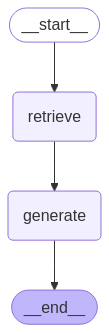

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

### Multiples formas de invocar nuestro grafo (gráfica (?))

In [29]:
for step in graph.stream(
    {"question": "What is Task Decomposition?"}, stream_mode="updates"
):
    rprint(f"{step}\n\n----------------\n")

{'retrieve': {'context': [Document(id='e6be1a5b-7ba8-4f8a-9668-e06ce0b05dcd', metadata={'source': 
'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 1585}, page_content='Fig. 1. Overview of a 
LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An 
agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has
become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to 
“think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. 
CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s 
thinking process.'), Document(id='9fde0b98-bb72-4073-ae59-6c64e1541d30', metadata={'source': 
'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 1585}, page_content='Fig. 1. Overview of a 
LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An 
agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has
become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to 
“think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. 
CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s 
thinking process.'), Document(id='2b182e3f-5f8e-476b-b506-fd89740f71c7', metadata={'source': 
'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 1585}, page_content='Fig. 1. Overview of a 
LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An 
agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has
become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to 
“think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. 
CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s 
thinking process.'), Document(id='2d087bfc-687d-47af-a3d2-fe4c1da04fd6', metadata={'source': 
'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 19372}, page_content="(3) Task execution: 
Expert models execute on the specific tasks and log results.\nInstruction:\n\nWith the input and the inference 
results, the AI assistant needs to describe the process and results. The previous stages can be formed as - User 
Input: {{ User Input }}, Task Planning: {{ Tasks }}, Model Selection: {{ Model Assignment }}, Task Execution: {{ 
Predictions }}. You must first answer the user's request in a straightforward manner. Then describe the task 
process and show your analysis and model inference results to the user in the first person. If inference results 
contain a file path, must tell the user the complete file path.")]}}

----------------

KeyboardInterrupt: 

In [30]:
for message, metadata in graph.stream(
    {"question": "What is Task Decomposition?"}, stream_mode="messages"
):
    print(message.content, end="")

<think>
Okay, let's tackle this question. The user is asking about Task Decomposition. From the context provided, I need to explain what Task Decomposition is.

Looking at the context, it mentions Chain of Thought (CoT) as a prompting technique where the model breaks down complex tasks into smaller steps. The key points here are that CoT helps the model think step by step, decomposing tasks into manageable parts. The context also states that CoT transforms big tasks into smaller ones, making them easier for the model to handle.

So, Task Decomposition is the process of breaking down a complex task into smaller, simpler subtasks. The model uses CoT to simulate this thinking, allowing it to handle each step sequentially. The example given is that the model is instructed to "think step by step" to decompose hard tasks. This approach enhances the model's ability to solve complex problems by managing the workload in smaller parts.

I need to make sure the answer is concise, uses three sente

## Dando posibilidades conversacionales al RAG

Hoy día es muy popular interactuar con estos sistemas de Q&A a traves de una interfaz de chat conversacional. Esto es permitir que el usuario tenga una conversación de ida y vuelta con nuestro sistema. Esto implica que el sistema debe tener "memoria" para acceder a las preguntas y respuestas pasadas y cierta lógica para incorporar el historial para generar nuevas respuestas.

Una forma modelar la interface conversacional es a traves de [mensajes](https://python.langchain.com/docs/concepts/messages/) con ciertos roles (user, IA, system), contenido y metadata. En particular los estados de nuestro RAG serán representado como secuencias de mensajes con las siguientes particularidades:

1. Entrada del usuario modelada como `HumanMessage`
2. La query que haremos al *vector store* como `AIMessage`
3. Los documentos reelevantes como `ToolMessage`
4. La respuesta final como `AIMessage`

Este modelo de estadod viene integrado en LangGraph

In [31]:
from langgraph.graph import MessagesState, StateGraph

graph_msg_builder = StateGraph(MessagesState)

### Tool calling

Permitir que se realizen llamadas a *tools* en la etapa de *retrieval* posibilitará que el modelo genera la query.

#### ❓ ¿Porqué sería reelevante hacer esto?

En una conversación puede que la query del usuario deba contextualizarse basandonos en el historial. Por ejemplo:

```
User: ¿Qué es el mole?

IA: El model es un platillo mexicano, a base de chocolate, pimienta, pan (bolillo), tortilla tostada, chiles, tomate, cebolla, clavo (especie), comino, nuez, almendra (no en todos los tipos de mole), laurel.

User: ¿Cuál es la forma mas sencilla de prepararlo?
```

En este caso, el modelo debería generar una query del esitlo: "formas sencillas de preparar mole". Habilitar llamadas a *tools* permite esta generación.

In [34]:
# Convirtiendo nuestro retrieve en una tool
from langchain_core.tools import tool


@tool(response_format="content_and_artifact")
def retrieve_tool(query: str):
    """Retrieve information related to a user query"""
    retrieved_docs = vector_store.similarity_search(query)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\nContent: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs

Más sobre crear *tools* en la [docu](https://python.langchain.com/docs/how_to/custom_tools/). Acá explican porqué `response_format="content_and_artifact"`

El grafo consistirá en tres nodos:

1. Un nodo que procesa la entrada del usuario y genera una query para el *retriever* o responde directamente
2. Otro nodo para el *retriever tool* que ejecutará la obtención de los documentos reelevantes
3. El último nodo que genera la respuesta final utilizando el contexto del *retriever*

Los elementos del grafo se definen acontinuación

In [32]:
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import ToolNode

# 1. Generamos un AIMessage que podría incluir la llamada a una tool
def query_or_respond(state: MessagesState):
    """Genera una tool call para retrieval o responde directo
    """
    llm_with_tools = llm.bind_tools([retrieve_tool])
    response = llm_with_tools.invoke(state["messages"])
    return {"messages": [response]}

In [35]:
# 2. Ejecutamos el paso de *retrieval*
tools = ToolNode([retrieve_tool])

In [36]:
# 3. Generamos la respuesta utilizando el contenido obtenido
def generate(state: MessagesState):
    """Genera una respuesta"""
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if not message.type == "tool":
            break
        recent_tool_messages.append(message)
    # Obtenemos los mensajes de tools en orden inverso
    tool_messages = recent_tool_messages[::-1]
    # Creando un prompt con los mensajes
    docs_content = "\n\n".join(doc.content for doc in tool_messages)
    system_message = (
        "You are an assistant for question-answering tasks. "
        "Use the following pieces of retrieved context to answer "
        "the question. If you don't know the answer, say that you "
        "don't know. Use three sentences maximum and keep the "
        "answer concise."
        "\n\n"
        f"{docs_content}"
    )
    convertation = [
        message
        for message in state["messages"]
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message)] + convertation

    # Run!
    response = llm.invoke(prompt)
    return {"messages": [response]}

#### Construyendo el grafo

Concentraremos los elementos definidos anteriormente en un solo objeto `graph`. Conectaremos los pasos en una secuencia y permitiremos que el primer paso `query_or_respond` realice un *short-circuit* y responda directamente en caso de no necesitar llamas a las *tools*. Esto permire que nuestro RAG brinde una experiencia conversacional más "natural", por ejemplo: respondiendo a saludos del usuario donde, en principio, no se requeriría ir a la base de datos vectorial.

In [37]:
from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition

graph_msg_builder.add_node(query_or_respond)
graph_msg_builder.add_node(tools)
graph_msg_builder.add_node(generate)

graph_msg_builder.set_entry_point("query_or_respond")
graph_msg_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"}
)

graph_msg_builder.add_edge("tools", "generate")
graph_msg_builder.add_edge("generate", END)

graph_tools = graph_msg_builder.compile()

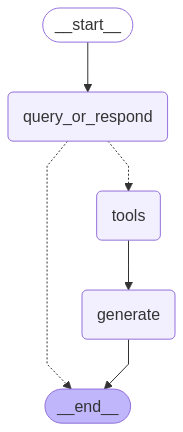

In [ ]:
from IPython.display import Image, display

display(Image(graph_tools.get_graph().draw_mermaid_png()))

### Pruebas del RAG

In [ ]:
input_message = "Hello"

for step in graph_tools.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Hello
================================== Ai Message ==================================

<think>
Okay, the user said "Hello". I need to respond appropriately. Since there's no specific query here, I should greet them back and offer help. Let me check if there's any function needed. The provided tools have a retrieve_tool, but the user's message isn't asking for information retrieval. So I don't need to call any functions. Just a friendly response.
</think>

Hello! How can I assist you today? 😊


Vemos que no ejecutó el paso de *retriever*

In [ ]:
input_message = "What's a CRF?"

for step in graph_tools.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What's a CRF?
================================== Ai Message ==================================
Tool Calls:
  retrieve_tool (412a72ab-ec11-4604-ba3d-88645a5a756f)
 Call ID: 412a72ab-ec11-4604-ba3d-88645a5a756f
  Args:
    query: What is a CRF?
================================= Tool Message =================================
Name: retrieve_tool

Source: {'source': 'https://www.davidsbatista.net/blog/2017/11/13/Conditional_Random_Fields/', 'start_index': 633}
Content: Introduction
CRFs were proposed roughly only a year after the Maximum Entropy Markov Model, basically by the same authors. Reading through the original paper that introduced Conditional Random Fields, one finds at the beginning of this sentence:
“The critical difference between CRF and MEMM is that the latter uses per-state exponential models for the conditional probabilities of next states given the current state, whereas CRF uses a single expo

# Práctica final: Construcción de un RAG especializado

## Fecha de entrega: 25 de Mayo de 2025

Desarrolla en equipos de dos/tres personas una aplicación *user-friendly* que implemente un RAG con algún LLM "ligero" local usando `ollama`

#### Requerimientos

- Debería poder correr "razonablemente bien" en sus laptops
- Interface de usuaria
  - Puede ser CLI o GUI
    - Opciones GUI: [Streamlit](https://streamlit.io/), [Gradio](https://www.gradio.app/)
    - Opciones CLI: [Argparse](https://docs.python.org/3/library/argparse.html), [Click](https://click.palletsprojects.com/en/stable/)
  - La usuaria deberia poder agregar sus documentos personales en local
    - El soporte de formatos queda a su consideración
      - CSVs, txts, pdfs o todos 
- Agrega documentación sobre el uso y capacidades del sistema
  - Recursos sobre documentaciones perronas: https://diataxis.fr/
- Agrega una reflexión sobre las limitaciones del sistema y problemas sociales que puedan surgir de los mismos como riesgos, sesgos, protección de datos, implicaciones éticas y su impacto en la diversidad social.
  - Aborda los temas que consideres más reelevantes, no necesariamente todos


### Ideas de apps (elige una)

- StudyBuddy: Aplicación que con base en tus notas de clase y documentos relacionados te ayuda a estudiar para pasar tu examen final.
- LegalLangSimplifier: Poder hacer queries en un conjunto de documentos legales (el diario oficial de la federación, la constitución, reglamento de tránsito, mi contrato de empleado de la UNAM) y obtener respuestas entendibles para cualquier persona sin especialización en este lenguaje.
- La app que quieras proponer 🧙🏼‍♂️
  - Debe utilizar RAG

**NOTA:** Experimenten con modelos pequeños para la etapa de desarrollo, modifiquen los prompts y consideren las limitantes de recursos de cómputo

### Referencias

- https://python.langchain.com/docs/tutorials/rag/
- https://python.langchain.com/docs/tutorials/qa_chat_history/
- [Capítulo 14 del libro Speech and Language Processing (Jurafsky et al. 2025)](https://web.stanford.edu/~jurafsky/slp3/14.pdf)

![](https://c.tenor.com/RxH7CLG1iC8AAAAC/thats-all-folks-looney.gif)